In [1]:
import numpy as np
import pandas as pd


df = pd.DataFrame({
    "age":   [22, 35, 41, 29, 50, 33, 27, 46, 38, 31, 24, 57],
    "income":[52000, 88000, 76000, 61000, 120000, 95000, 58000, 110000, 83000, 67000, 49000, 140000],
    "visits":[1, 4, 2, 3, 7, 5, 3, 6, 4, 2, 3, 8],
    "city":  ["Tehran","Shiraz","Tehran","Tabriz","Shiraz","Mashhad","Tabriz","Tehran","Mashhad","Shiraz","Tehran","Mashhad"],
    "score": [0.72, 0.81, 0.65, 0.70, 0.92, 0.88, 0.60, 0.75, 0.83, 0.79, 0.68, 0.90]
})


df.loc[[2, 9], "income"] = np.nan
df.loc[[1, 6, 10], "score"] = np.nan


income_median = df["income"].median()
df["income"] = df["income"].fillna(income_median)


df["score"] = df["score"].fillna(df.groupby("city")["score"].transform("mean"))

df_filtered = df[df["visits"] >= 3].reset_index(drop=True)

print("Original after fill:")
print(df)
print("\nFiltered (visits >= 3):")
print(df_filtered)


Original after fill:
    age    income  visits     city     score
0    22   52000.0       1   Tehran  0.720000
1    35   88000.0       4   Shiraz  0.855000
2    41   85500.0       2   Tehran  0.650000
3    29   61000.0       3   Tabriz  0.700000
4    50  120000.0       7   Shiraz  0.920000
5    33   95000.0       5  Mashhad  0.880000
6    27   58000.0       3   Tabriz  0.700000
7    46  110000.0       6   Tehran  0.750000
8    38   83000.0       4  Mashhad  0.830000
9    31   85500.0       2   Shiraz  0.790000
10   24   49000.0       3   Tehran  0.706667
11   57  140000.0       8  Mashhad  0.900000

Filtered (visits >= 3):
   age    income  visits     city     score
0   35   88000.0       4   Shiraz  0.855000
1   29   61000.0       3   Tabriz  0.700000
2   50  120000.0       7   Shiraz  0.920000
3   33   95000.0       5  Mashhad  0.880000
4   27   58000.0       3   Tabriz  0.700000
5   46  110000.0       6   Tehran  0.750000
6   38   83000.0       4  Mashhad  0.830000
7   24   49000.0 

In [2]:

df_filtered["engagement"] = df_filtered["visits"] * df_filtered["score"]

df_filtered["engagement_level"] = pd.qcut(
    df_filtered["engagement"],
    q=3,
    labels=["low", "medium", "high"]
)



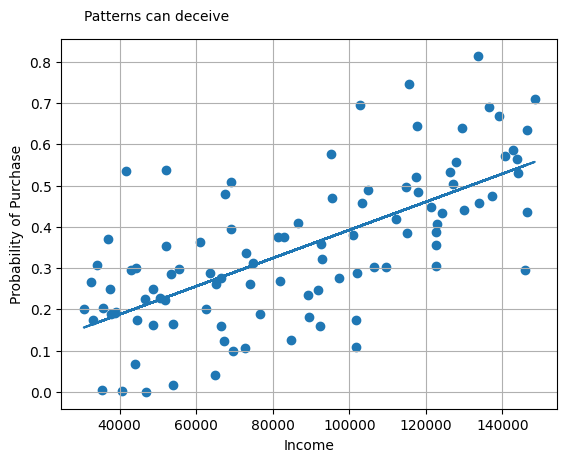

In [3]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
income = np.random.uniform(30000, 150000, 100)
probability_of_purchase = 0.000004 * income + np.random.normal(0, 0.15, 100)
probability_of_purchase = np.clip(probability_of_purchase, 0, 1)


plt.figure()
plt.scatter(income, probability_of_purchase)
plt.xlabel("Income")
plt.ylabel("Probability of Purchase")

z = np.polyfit(income, probability_of_purchase, 1)
p = np.poly1d(z)
plt.plot(income, p(income))


plt.text(min(income), 0.9, "Patterns can deceive")
plt.grid(True)
plt.show()


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


np.random.seed(42)
n = 300

df = pd.DataFrame({
    "age": np.random.randint(18, 66, n),
    "income": np.random.randint(30000, 150001, n),
    "visits": np.random.randint(1, 11, n),
})


df["target"] = ((df["income"] > 80000) & (df["visits"] > 5)).astype(int)

X = df[["age", "income", "visits"]]
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


log_reg = LogisticRegression(max_iter=1000)
tree = DecisionTreeClassifier(random_state=42)

log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)


log_acc = accuracy_score(y_test, log_reg.predict(X_test))
tree_acc = accuracy_score(y_test, tree.predict(X_test))

print("Logistic Regression accuracy:", log_acc)
print("Decision Tree accuracy:", tree_acc)


Logistic Regression accuracy: 0.9
Decision Tree accuracy: 1.0


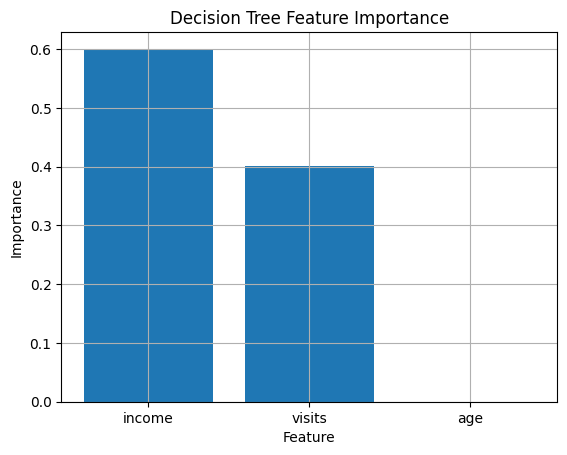

income    0.599124
visits    0.400876
age       0.000000
dtype: float64


In [5]:
import matplotlib.pyplot as plt
import pandas as pd


importances = tree.feature_importances_
features = X.columns
fi = pd.Series(importances, index=features).sort_values(ascending=False)


plt.figure()
plt.bar(fi.index, fi.values)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Feature Importance")
plt.grid(True)
plt.show()

print(fi)
